In [1]:
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# gala
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

In [2]:
from astropy.io import fits

In [142]:
alldata = fits.getdata('/Users/apricewhelan/data/APOGEE_DR16/apogee_astroNN-DR16.fits')[1:]
print(len(alldata))

data = alldata[np.abs(alldata['dist'] / alldata['dist_error']) > 4.]
data = data[(data['LOGG'] < 3.5) & (data['FE_H'] < -0.75)]
print(len(data))

473306


/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


14632


/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [143]:
c = coord.SkyCoord(data['ra']*u.deg, data['dec']*u.deg,
                   distance=data['dist']*u.pc,
                   pm_ra_cosdec=data['pmra']*u.mas/u.yr,
                   pm_dec=data['pmdec']*u.mas/u.yr,
                   radial_velocity=data['vhelio_avg']*u.km/u.s)

/Users/apricewhelan/anaconda/lib/python3.7/site-packages/astropy/coordinates/angles.py:522: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/astropy/coordinates/angles.py:522: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):


In [144]:
galcen = c.transform_to(gc.get_galactocentric2019())

In [145]:
w0 = gd.PhaseSpacePosition(galcen.data)

In [146]:
mw = gp.MilkyWayPotential()

In [147]:
# E = mw.energy(w0).to((220*u.km/u.s)**2)
# L = w0.angular_momentum().to(8*u.kpc * 220*u.km/u.s)
E = mw.energy(w0).to(1e5 * (u.km/u.s)**2)
L = w0.angular_momentum().to(1e3 * u.kpc *u.km/u.s)
Lz = L[2]

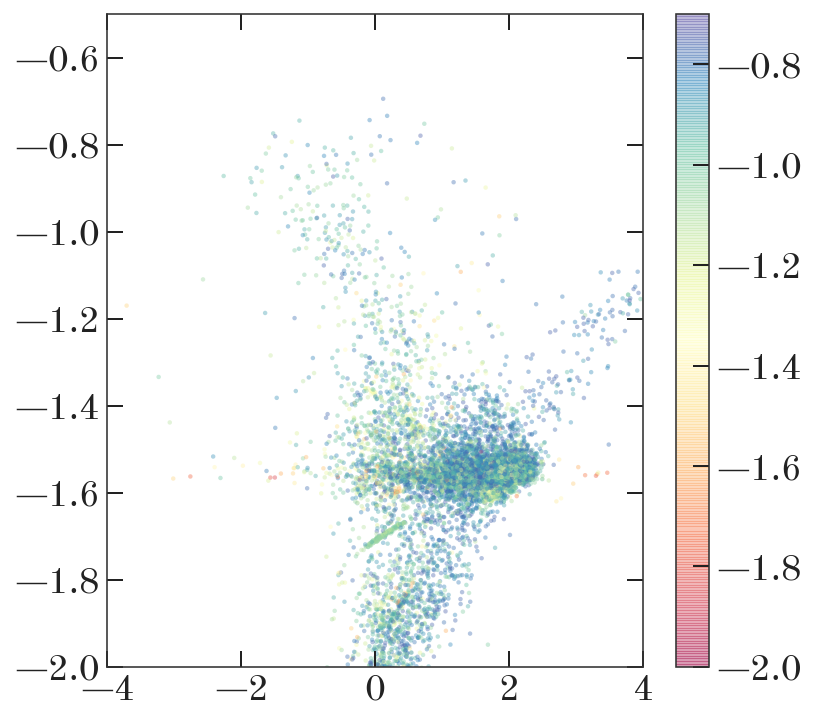

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# ax.plot(-Lz.value, E.value, 
#         marker='o', mew=0, ls='none', 
#         alpha=0.2, ms=1.5)

# ax.set_xlim(-1, 1)
# ax.set_ylim(-6, -2.)

cc = ax.scatter(-Lz.value, E.value, c=data['FE_H'],
           vmin=-2, vmax=-0.7, s=5,
           cmap='Spectral',
           marker='o', lw=0, alpha=0.4)

ax.set_xlim(-4., 4)
ax.set_ylim(-2, -0.5)

fig.colorbar(cc)

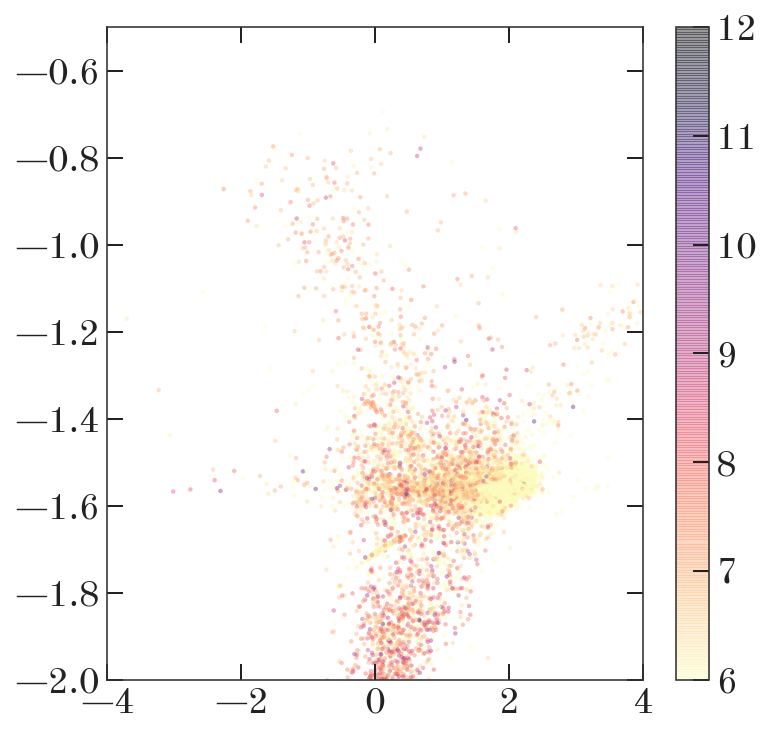

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# ax.plot(-Lz.value, E.value, 
#         marker='o', mew=0, ls='none', 
#         alpha=0.2, ms=1.5)

# ax.set_xlim(-1, 1)
# ax.set_ylim(-6, -2.)

cc = ax.scatter(-Lz.value, E.value, c=data['Age'],
                vmin=6, vmax=12, s=5,
                cmap='magma_r',
                marker='o', lw=0, alpha=0.4)

ax.set_xlim(-4., 4)
ax.set_ylim(-2, -0.5)

fig.colorbar(cc)

In [150]:
mask = ((Lz.value < 0) & (Lz.value > -2.3) & 
        (E.value < -0.7) & (E.value > -1.2))
mask.sum()

/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


75

(-0.25, 0.5)

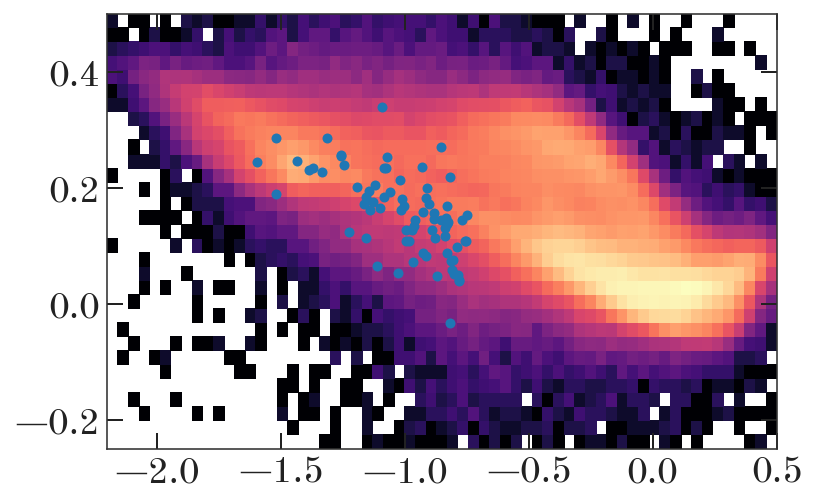

In [156]:
plt.scatter(data['FE_H'][mask],
            data['MG_H'][mask] - data['FE_H'][mask],
            lw=0, zorder=100, color='tab:blue')

plt.hist2d(alldata['FE_H'],
           alldata['MG_H'] - alldata['FE_H'],
           bins=(np.linspace(-2.2, 0.5, 64),
                 np.linspace(-0.25, 0.5, 32)), 
           norm=mpl.colors.LogNorm())

plt.xlim(-2.2, 0.5)
plt.ylim(-0.25, 0.5)